In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score

In [3]:
import joblib

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
housing_data = fetch_california_housing()

In [6]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [42]:
col_names = housing_data.feature_names

In [8]:
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
data = pd.DataFrame(housing_data.data , columns = col_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10543,2.8192,29.0,5.350379,1.026515,3985.0,3.773674,33.68,-117.70
6023,1.6645,35.0,4.144231,1.086538,1494.0,4.788462,34.05,-117.75
13000,4.2273,18.0,5.069252,0.867036,905.0,2.506925,38.67,-121.26
11222,4.3750,27.0,5.205742,1.057416,1440.0,3.444976,33.80,-117.90
2008,1.8967,52.0,5.000000,1.049180,406.0,3.327869,36.74,-119.82


In [11]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
housing_data.target_names

['MedHouseVal']

In [13]:
data['MedHouseVal'] = housing_data.target

In [14]:
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13916,3.0139,18.0,6.468750,1.376953,1251.0,2.443359,34.14,-116.15,0.826
2026,1.5611,29.0,4.462916,1.127877,1530.0,3.913043,36.71,-119.76,0.444
1243,2.2754,23.0,5.129853,1.036145,2435.0,3.259705,39.00,-122.13,0.592
15248,5.5922,21.0,6.167286,1.074349,1273.0,2.366171,32.99,-117.27,3.821
3256,2.3750,26.0,6.000000,1.000000,13.0,1.625000,35.87,-120.13,0.713


In [15]:
data.to_csv('Calafornia_housing.csv' , index = False)

In [16]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [17]:
#data['MedInc'].fillna()

In [18]:
data.dropna(inplace = True) #delets null value

In [19]:
data.duplicated().count()

20640

In [20]:
data.drop_duplicates(inplace = True)

In [21]:
data.shape

(20640, 9)

In [22]:
X = data.drop(['MedHouseVal'] , axis = 1)
y = data['MedHouseVal']

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y  ,
                                                    test_size= 0.2 , 
                                                    random_state = 111 ,
                                                    shuffle = True
                                                    )


In [24]:
X_train.shape

(16512, 8)

In [25]:
X_test.shape

(4128, 8)

In [26]:
y_train.shape

(16512,)

In [27]:
y_test.shape

(4128,)

In [28]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

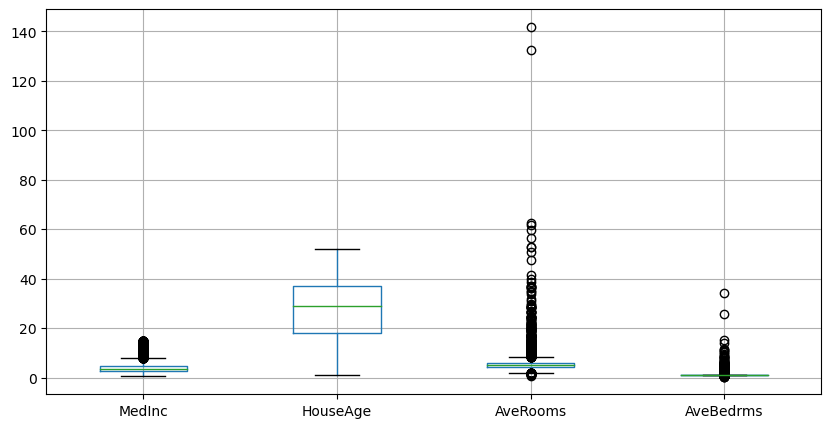

In [29]:
plt.figure(figsize=(10 , 5))
data.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'])
plt.show()

In [30]:
data[data['AveRooms']>= 20].shape

(69, 9)

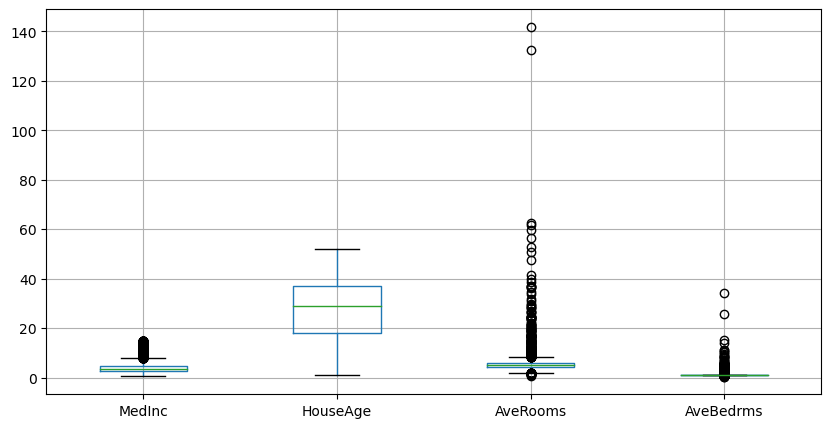

In [31]:
plt.figure(figsize=(10 , 5))
X_train.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'])
plt.show()

In [32]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [33]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119824,0.310043,-0.062500,0.008608,0.021777,-0.080476,-0.014962
HouseAge,-0.119824,1.000000,-0.142722,-0.069244,-0.295119,0.015067,0.008660,-0.104869
AveRooms,0.310043,-0.142722,1.000000,0.859841,-0.071119,-0.004217,0.106408,-0.027215
AveBedrms,-0.062500,-0.069244,0.859841,1.000000,-0.065808,-0.005614,0.070167,0.011609
Population,0.008608,-0.295119,-0.071119,-0.065808,1.000000,0.074041,-0.102467,0.092754
AveOccup,0.021777,0.015067,-0.004217,-0.005614,0.074041,1.000000,0.005323,-0.000006
Latitude,-0.080476,0.008660,0.106408,0.070167,-0.102467,0.005323,1.000000,-0.924154
Longitude,-0.014962,-0.104869,-0.027215,0.011609,0.092754,-0.000006,-0.924154,1.000000


In [34]:
from sklearn.preprocessing import RobustScaler , StandardScaler 
from sklearn.ensemble import RandomForestRegressor

In [35]:
#scaler = RobustScaler()
scaler = StandardScaler()

In [36]:
#X_train = scaler.fit_transform(X_train ,)
#X_test = scaler.transform(X_test)

In [37]:
#model = LinearRegression(n_jobs=-1)
model = RandomForestRegressor(n_jobs=-1)

In [38]:
model.fit(X_train , y_train)

RandomForestRegressor(n_jobs=-1)

In [39]:
y_pred = model.predict(X_test)

In [40]:
mean_absolute_error(y_test , y_pred)

0.3373306175145351

In [41]:
r2_score(y_test , y_pred)

0.7973832851478057